# Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework.

*Federico Medina A01721441*

Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) sin usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que implementes manualmente el algoritmo, no que importes un algoritmo ya implementado. 


Dataset utilizado: https://www.kaggle.com/datasets/bhuviranga/co2-emissions?select=CO2+Emissions.csv

#### Librerias Utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Lectura de Datos

In [2]:
df = pd.read_csv("CO2 Emissions.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Descripción de los Datos

In [3]:
df.describe() #Observamos la descripción de los datos del dataframe

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [4]:
df.isnull().sum() #buscamos si hay algún valor nulo en la base de datos, sin embargo, no se encuentra ninguno por lo que la base está completa

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

#### Análisis de Datos

In [5]:
#Eliminamos las columnas que no se considerarán para el análisis

df = df.drop(columns=["Model", "Make", "Vehicle Class", "Transmission", "Fuel Type"])

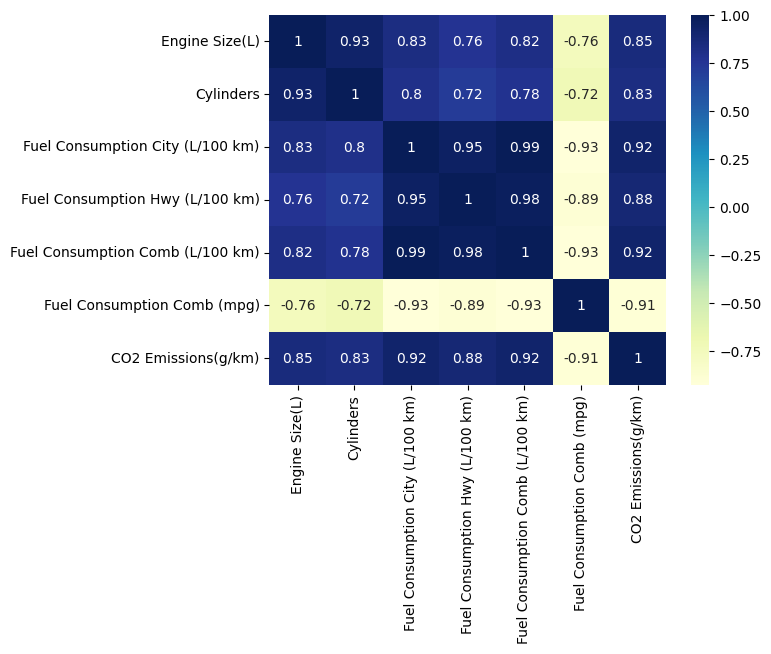

In [6]:
# Gráficar un heatmap de correlación
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Lo que se busca es encontrar qué variables tienen relación lineal con la variable de CO2 Emissions para ver cuales causan la contaminación vehicular. Sin embargo, podemos observar en el heatmap que todas las variables tienen una alta correlación con dicha variable, por lo que se hará una gráfica para cada una y luego se elegirá la variable que se utilizará.

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Engine Size(L)'>

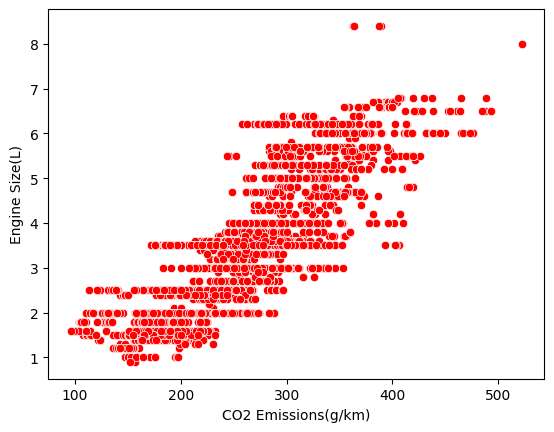

In [7]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Engine Size(L)'], color='red', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Cylinders'>

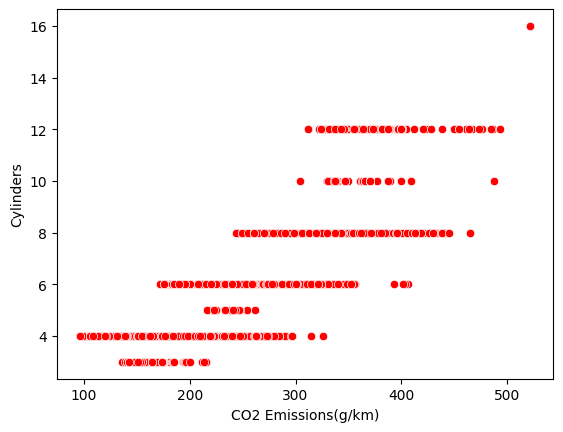

In [8]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Cylinders'], color='red', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption City (L/100 km)'>

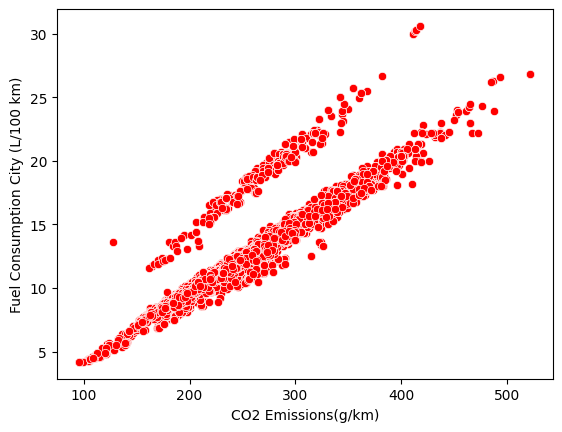

In [9]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Fuel Consumption City (L/100 km)'], color='red', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Hwy (L/100 km)'>

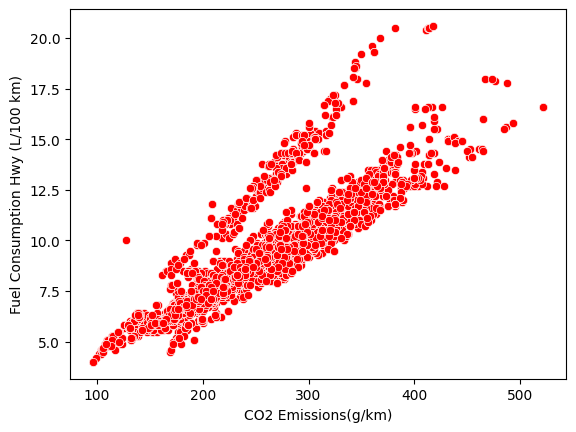

In [10]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Fuel Consumption Hwy (L/100 km)'], color='red', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Comb (L/100 km)'>

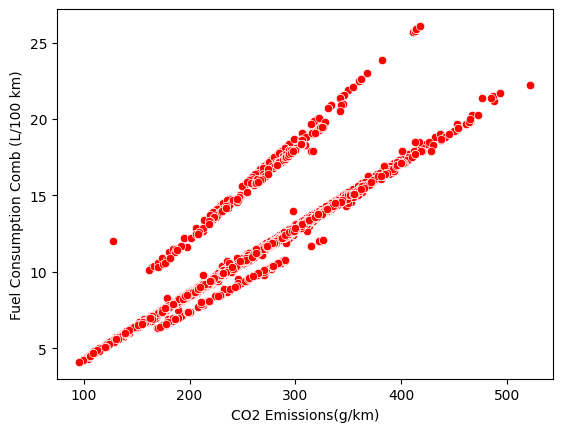

In [11]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Fuel Consumption Comb (L/100 km)'], color='red', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Comb (mpg)'>

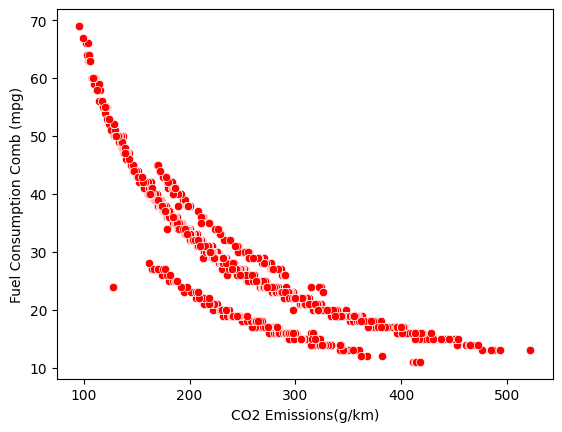

In [12]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Fuel Consumption Comb (mpg)'], color='red', marker='o')

Observando las gráficas se tomó la decisión de utilizar la variable de Engine Size (L) para compararla con la variable CO2 Emissions (g/km).

#### Creación del Modelo de Regresión Lineal

In [13]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1, 1]

# Cargar el valor del learning rate (alpha)
alpha = 0.0001

# Se definen las variables x y y
x = df['Engine Size(L)']
y = df['CO2 Emissions(g/km)']

# Calcular el total de muestras a partir de los datos (n)
n = len(x)

In [14]:
# Creaación de función de hipótesis
def _lambda(list: theta, int: n):

    h_theta = []
    delta_theta = []
    suma_delta_theta0 = 0
    suma_delta_theta1 = 0
   
    for i in range(n):
        h_theta.append(theta[0] + theta[1]*x[i])
        delta_theta_0 = (1/n)*(h_theta[i] - y[i])
        delta_theta_1 = (1/n)*((h_theta[i] - y[i])*x[i])
        suma_delta_theta0 += delta_theta_0
        suma_delta_theta1 += delta_theta_1
    
    return suma_delta_theta0, suma_delta_theta1


In [15]:
#definimos el numero de iteraciones

iteraciones = 1000

for i in range(iteraciones):
    # Calcular delta para theta y para cada muestra
    delta_theta0, delta_theta1 = _lambda(theta, n)
    delta_theta0, delta_theta1

    # Actualizar theta0
    theta_0 = theta[0] - alpha*delta_theta0

    # Actualizar theta1
    theta_1 = theta[1] - alpha*delta_theta1

    theta = [theta_0, theta_1]

theta

[15.682512822792553, 48.682133713317164]

#### Evaluación del Modelo